# Visualisations and familiarizations

This file contains our data visualisations, cleaning of the data and some
familiarizations to find relationships between columns.

In [ ]:
# Put the imports here, this makes it easy to create a requirements.txt file
# later, which can be used by whoever is grading us to install everything!
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [45]:
with open('./data/alzheimers_disease_data.csv', 'r') as f:
    lines = f.readlines()

header = lines[0].strip().split(',')
data = {column: [] for column in header}
for line in lines[1:]:
    values = line.strip().split(',')
    for i, value in enumerate(values):
        try:
            num = float(value)
            num = int(num) if num.is_integer() else num
            data[header[i]].append(num)
        except ValueError:
            data[header[i]].append(value)

# Accessing data (per column) can be done in the following way:
column = data['PatientID']
print(column[:5] + ['...'])

# To see all column names:
print(list(data.keys())[:5] + ['...'])

[4751, 4752, 4753, 4754, 4755, '...']
['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', '...']


## Internal and external factors

The dataset contains all sorts of different metrics for a patient. These metrics can be divided into three categories:
- Metadata: `PatientID`, `Diagnosis` and `DoctorInCharge` (since this one is just the same value everywhere)
- Internal factors: `Age`, `Gender`, `Ethnicity`, `BMI`, `FamilyHistoryAlzheimers`, `CardiovascularDisease`, `Diabetes`, `Depression`, `Hypertension`, `SystolicBP`, `DiastolicBP`, `CholesterolTotal`, `CholesterolLDL`, `CholesterolHDL`, `CholesterolTriglycerides`, `MMSE`, `FunctionalAssessment`, `MemoryComplaints`, `BehavioralProblems`, `ADL`, `Confusion`, `Disorientation`, `PersonalityChanges`, `DifficultyCompletingTasks` and `Forgetfulness`
- External factors: `EducationLevel`, `Smoking`, `AlcoholConsumption`, `PhysicalActivity`, `DietQuality` and `SleepQuality`

The metadata is not important for the tests and experiments on the data, as this says nothing about the condition of the patient. The only column here that is important is `Diagnosis`, as it tells us whether or not a patient actually has Alzheimer's disease. This is, for example, the target vector we can use for a regression model.

The internal and external factors can be examined, since these actually tell us something about the health of the patient. These could have an effect on whether or not someone has Alzheimer's disease and therefore they can be used to, for example, make predictions.

In [4]:
# Split the dataset into the three categories described above:
metadata_keys = ["PatientID", "Diagnosis", "DoctorInCharge"]
internal_factors_keys = [
    "Age", "Gender", "Ethnicity", "BMI", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "Hypertension",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment",
    "MemoryComplaints", "BehavioralProblems", "ADL", "Confusion",
    "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
    "Forgetfulness", "HeadInjury"
]
external_factors_keys = ["EducationLevel", "Smoking", "AlcoholConsumption",
                         "PhysicalActivity", "DietQuality", "SleepQuality"]

metadata = {key: data[key] for key in metadata_keys if key in data}
internal_factors = {key: data[key] for key in internal_factors_keys if key in data}
external_factors = {key: data[key] for key in external_factors_keys if key in data}

print("Metadata:", list(metadata.keys()))
print("Internal Factors:", list(internal_factors.keys()))
print("External Factors:", list(external_factors.keys()))

Metadata: ['PatientID', 'Diagnosis', 'DoctorInCharge']
Internal Factors: ['Age', 'Gender', 'Ethnicity', 'BMI', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'HeadInjury']
External Factors: ['EducationLevel', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']


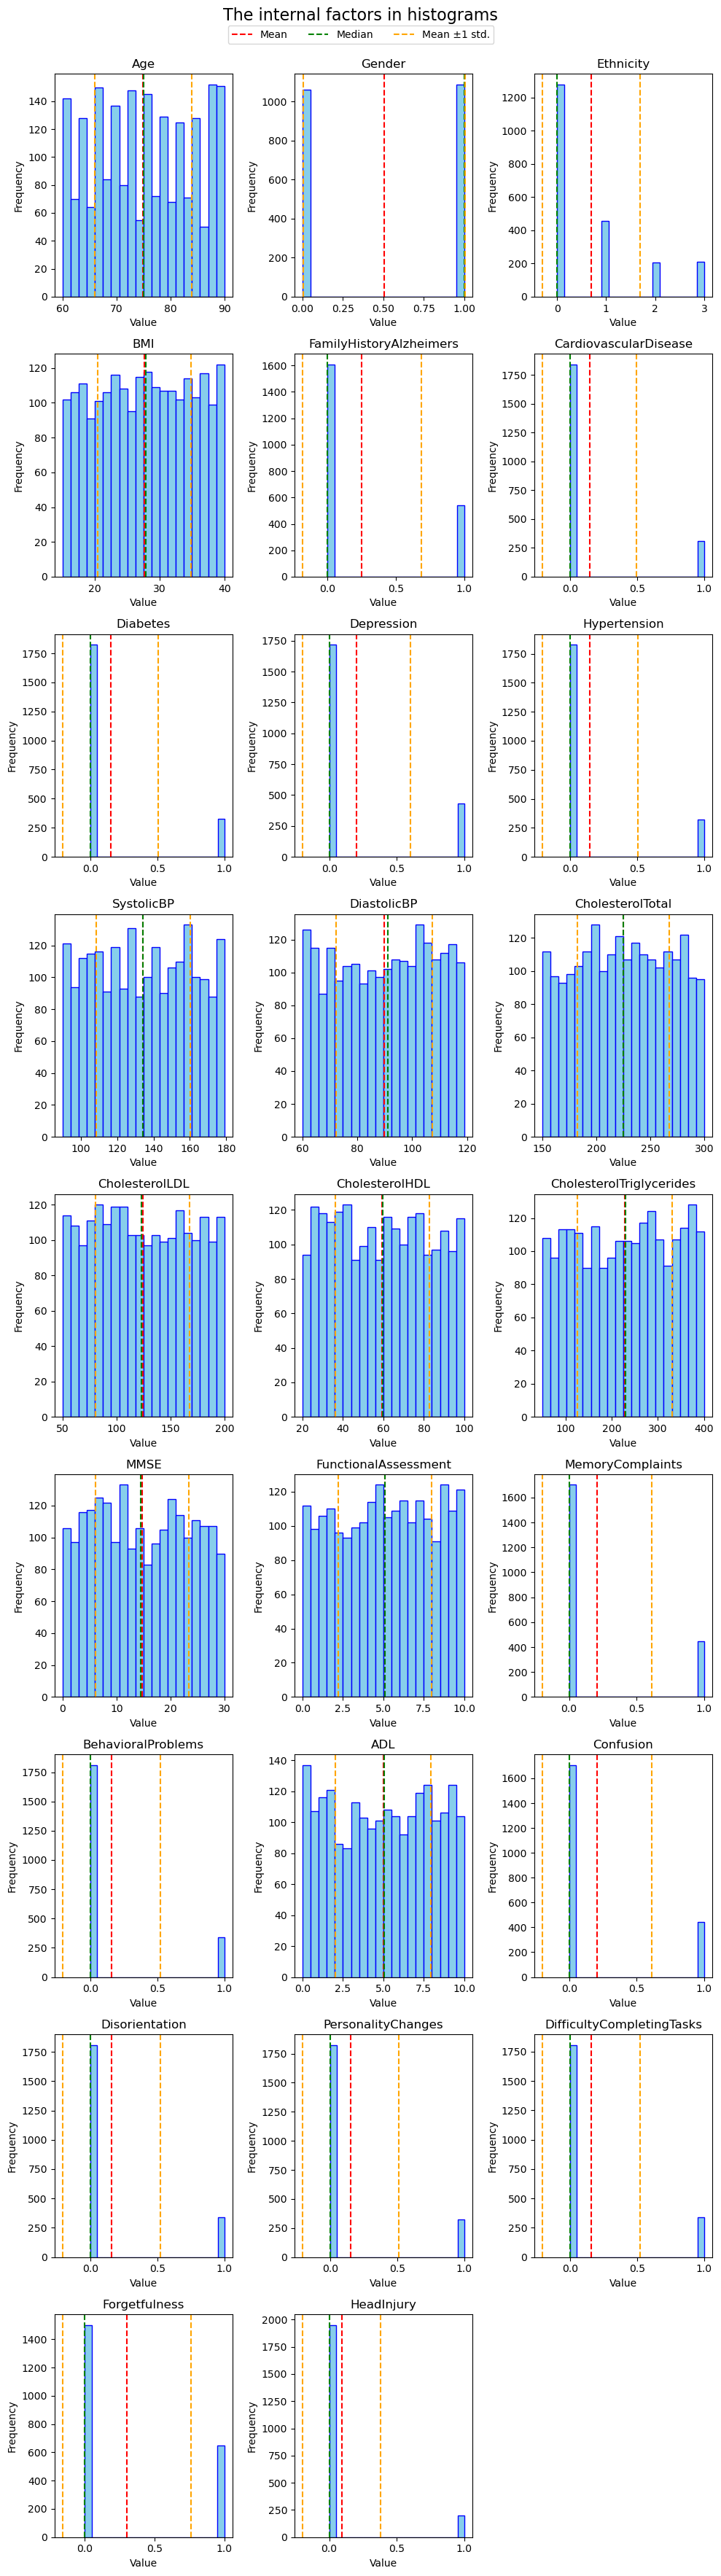

In [18]:
# Plot the internal factors into an image with two columns
num_plots = len(internal_factors)
columns = 3
rows = (num_plots + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(10, rows * 4))
fig.suptitle('The internal factors in histograms', fontsize=16)
axes = axes.flatten()

mean_line = Line2D([0], [0], color='red', linestyle='dashed', label='Mean')
median_line = Line2D([0], [0], color='green', linestyle='dashed', label='Median')
std_line = Line2D([0], [0], color='orange', linestyle='dashed', label='Mean ±1 std.')

for i, (key, values) in enumerate(internal_factors.items()):
    axes[i].hist(values, bins=20, color='skyblue', edgecolor='blue')
    mean = np.mean(values)
    std = np.std(values)
    median = np.median(values)

    axes[i].axvline(mean, color='red', linestyle='dashed')
    axes[i].axvline(median, color='green', linestyle='dashed')
    axes[i].axvline(mean + std, color='orange', linestyle='dashed')
    axes[i].axvline(mean - std, color='orange', linestyle='dashed')

    axes[i].set_title(key)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.legend(handles=[mean_line, median_line, std_line], loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 0.975))

plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

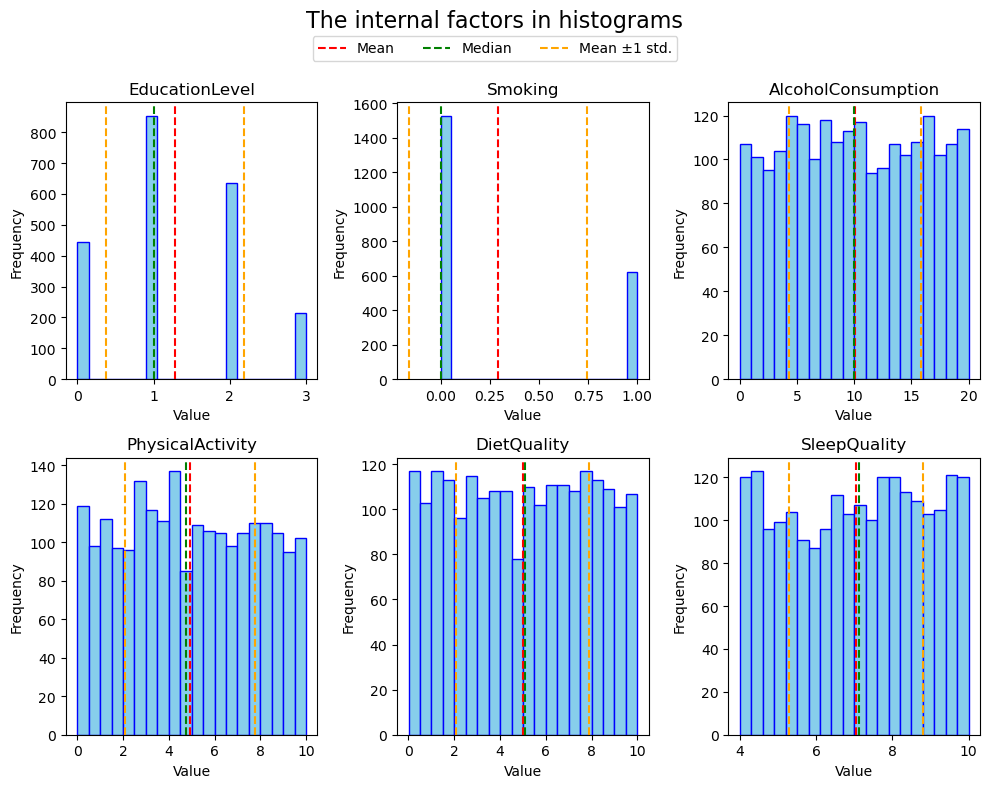

In [24]:
# Plot the internal factors into an image with two columns
num_plots = len(external_factors)
columns = 3
rows = (num_plots + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(10, rows * 4))
fig.suptitle('The internal factors in histograms', fontsize=16)
axes = axes.flatten()

mean_line = Line2D([0], [0], color='red', linestyle='dashed', label='Mean')
median_line = Line2D([0], [0], color='green', linestyle='dashed', label='Median')
std_line = Line2D([0], [0], color='orange', linestyle='dashed', label='Mean ±1 std.')

for i, (key, values) in enumerate(external_factors.items()):
    axes[i].hist(values, bins=20, color='skyblue', edgecolor='blue')
    mean = np.mean(values)
    std = np.std(values)
    median = np.median(values)

    axes[i].axvline(mean, color='red', linestyle='dashed')
    axes[i].axvline(median, color='green', linestyle='dashed')
    axes[i].axvline(mean + std, color='orange', linestyle='dashed')
    axes[i].axvline(mean - std, color='orange', linestyle='dashed')

    axes[i].set_title(key)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.legend(handles=[mean_line, median_line, std_line], loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 0.955))

plt.tight_layout(rect=[0, 0, 1, 0.955])
plt.show()

### Findings
There are a few columns that seem to follow just a few categories:
- Internal factors: `Gender`, `Ethnicity`, `FamilyHistoryAlzheimers`,
`CardiovascularDisease`, `Diabetes`, `Depression`, `Hypertension`,
`MemoryComplaints`, `BehavioralProblems`, `Confusion`, `Disorientation`,
`PersonalityChanges`, `DifficultyCompletingTasks`, `Forgetfulness` and
`HeadInjury`
- External factors: `EducationLevel` and `Smoking`

Out of these, `Ethnicity` and `EducationLevel` have more than two categories,
while the other ones only have two. Something that stands out in the columns
with only two categories, is that usually the 'No' bar (corresponding to
value 0) is much larger than the 'Yes' bar (corresponding to value 1). The only
categorical data where this is not the case is the `Gender` column, which shows
that the two genders are represented roughly equally. A next step for cleaning
the columns mentioned above is to attach a more meaningful label to the numbers.

For all colums that do not follow a few categories we see that the median and
mean are roughly at the same value. Besides that, none of the columns seem to
follow some sort of distribution. However, it also does not seem like each
symptom is uniformly distributed among the population.

In [41]:
# Attach the correct labels to categorical data columns
yesno_cols = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
              'Depression', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
              'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
              'Forgetfulness', 'HeadInjury', 'Smoking']
labeled_data = {}
for key in yesno_cols:
    labeled_data[key] = np.where(
        np.array(data[key]) == 0, 'no', 'yes').tolist()
labeled_data['Gender'] = np.where(
    np.array(data['Gender']) == 0, 'male', 'female').tolist()
mapping = {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}
labeled_data['Ethnicity'] = np.vectorize(
    mapping.get)(data['Ethnicity']).tolist()
mapping = {0: "none", 1: "high school", 2: "bachelor", 3: "higher"}
labeled_data['EducationLevel'] = np.vectorize(
    mapping.get)(data['EducationLevel']).tolist()

for key in labeled_data.keys():
    print(f'{key}: {labeled_data[key][:5] + ['...']}')

FamilyHistoryAlzheimers: ['no', 'no', 'yes', 'no', 'no', '...']
CardiovascularDisease: ['no', 'no', 'no', 'no', 'no', '...']
Diabetes: ['yes', 'no', 'no', 'no', 'no', '...']
Depression: ['yes', 'no', 'no', 'no', 'no', '...']
Hypertension: ['no', 'no', 'no', 'no', 'no', '...']
MemoryComplaints: ['no', 'no', 'no', 'no', 'no', '...']
BehavioralProblems: ['no', 'no', 'no', 'yes', 'no', '...']
Confusion: ['no', 'no', 'no', 'no', 'no', '...']
Disorientation: ['no', 'no', 'yes', 'no', 'no', '...']
PersonalityChanges: ['no', 'no', 'no', 'no', 'yes', '...']
DifficultyCompletingTasks: ['yes', 'no', 'yes', 'no', 'yes', '...']
Forgetfulness: ['no', 'yes', 'no', 'no', 'no', '...']
HeadInjury: ['no', 'no', 'no', 'no', 'no', '...']
Smoking: ['no', 'no', 'no', 'yes', 'no', '...']
Gender: ['male', 'male', 'male', 'female', 'male', '...']
Ethnicity: ['Caucasian', 'Caucasian', 'Other', 'Caucasian', 'Caucasian', '...']
EducationLevel: ['bachelor', 'none', 'high school', 'high school', 'none', '...']


### Possible next steps:
- Use boxplots to find outliers (although it does not seem like there are any)
- Try to find correlations between numerical columns
- Try to find relationships between categorical columns and numerical ones